## 201804699 이준석
### 월별로 통합하기 위해 Datetime 자료형을 다루는데 시간을 잘못 쏟았습니다.
- CO 일산화 탄소
- SO2 아황산가스
- O3 오존농도
- NO2 이산화질소농도
- PM10 미세먼지



In [84]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl import Workbook
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from IPython.display import Image
from pandas import Series
import os
import time
from datetime import datetime
from pytz import timezone

In [85]:
df = pd.read_csv('/Users/adam/finalD.csv')

/Users/adam/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [86]:
df

,Unnamed: 0,지역,측정소명,측정소코드,측정일시,SO2,CO,O3,NO2,PM10
0,0,서울,중구,111121.0,2001010101,0.010000,0.8,0.012,0.0470,49.199978
1,1,서울,중구,111121.0,2001010102,0.010000,0.7,0.027,0.0400,49.199978
2,2,서울,중구,111121.0,2001010103,0.013000,0.9,0.015,0.0380,49.199978
3,3,서울,중구,111121.0,2001010104,0.014000,0.9,0.020,0.0360,49.199978
4,4,서울,중구,111121.0,2001010105,0.012000,0.7,0.032,0.0290,49.199978
...,...,...,...,...,...,...,...,...,...,...
53953461,53953461,인천 옹진군,울도,831495.0,2021043020,0.004872,0.3,0.046,0.0041,32.000000
53953462,53953462,인천 옹진군,울도,831495.0,2021043021,0.004872,0.3,0.045,0.0040,23.000000
53953463,53953463,인천 옹진군,울도,831495.0,2021043022,0.004872,0.3,0.041,0.0071,26.000000
53953464,53953464,인천 옹진군,울도,831495.0,2021043023,0.004872,0.3,0.035,0.0114,25.000000


In [87]:
df = df[['지역', '측정소명', '측정소코드', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10']]#불필요하게 생긴 인덱싱 제거

In [88]:
df_s=df.sort_values(by=['측정소코드'], ascending=[True]) #측정소 코드별로 재정렬
df_s

,지역,측정소명,측정소코드,측정일시,SO2,CO,O3,NO2,PM10
0,서울,중구,111121.0,2001010101,0.010,0.8,0.012,0.047,49.199978
19453125,서울,중구,111121.0,2011061205,0.004,1.0,0.000,0.061,56.000000
19453126,서울,중구,111121.0,2011061206,0.004,0.9,0.000,0.060,57.000000
19453127,서울,중구,111121.0,2011061207,0.004,0.9,0.002,0.056,55.000000
19453128,서울,중구,111121.0,2011061208,0.004,0.9,0.007,0.053,59.000000
...,...,...,...,...,...,...,...,...,...
35678527,NaN,NaN,NaN,NaN,0.004,1.0,0.009,0.086,91.000000
35678528,NaN,NaN,NaN,NaN,0.004,0.8,0.009,0.068,123.000000
35678529,NaN,NaN,NaN,NaN,0.004,0.8,0.009,0.062,133.000000
35678530,NaN,NaN,NaN,NaN,0.004,0.8,0.008,0.057,137.000000


In [27]:
df.isnull().sum()

지역       5579118
측정소명     5579118
측정소코드    5579118
측정일시     6049374
SO2            0
CO             0
O3             0
NO2            0
PM10           0
dtype: int64

In [89]:
#이전에 불용치 대체를 미세먼지와 화학물질 식에만 적용했는데, 지역, 측정소명, 측정소 코드, 측정 일시에도 많음을 발견, 해당 값이 없다면 측정값이 무의미 하기 떄문에 해당 행 삭제
df=df.dropna(axis=0)

In [32]:
df.isnull().sum()

지역       0
측정소명     0
측정소코드    0
측정일시     0
SO2      0
CO       0
O3       0
NO2      0
PM10     0
dtype: int64

In [90]:
df

,지역,측정소명,측정소코드,측정일시,SO2,CO,O3,NO2,PM10
0,서울,중구,111121.0,2001010101,0.010000,0.8,0.012,0.0470,49.199978
1,서울,중구,111121.0,2001010102,0.010000,0.7,0.027,0.0400,49.199978
2,서울,중구,111121.0,2001010103,0.013000,0.9,0.015,0.0380,49.199978
3,서울,중구,111121.0,2001010104,0.014000,0.9,0.020,0.0360,49.199978
4,서울,중구,111121.0,2001010105,0.012000,0.7,0.032,0.0290,49.199978
...,...,...,...,...,...,...,...,...,...
53953461,인천 옹진군,울도,831495.0,2021043020,0.004872,0.3,0.046,0.0041,32.000000
53953462,인천 옹진군,울도,831495.0,2021043021,0.004872,0.3,0.045,0.0040,23.000000
53953463,인천 옹진군,울도,831495.0,2021043022,0.004872,0.3,0.041,0.0071,26.000000
53953464,인천 옹진군,울도,831495.0,2021043023,0.004872,0.3,0.035,0.0114,25.000000


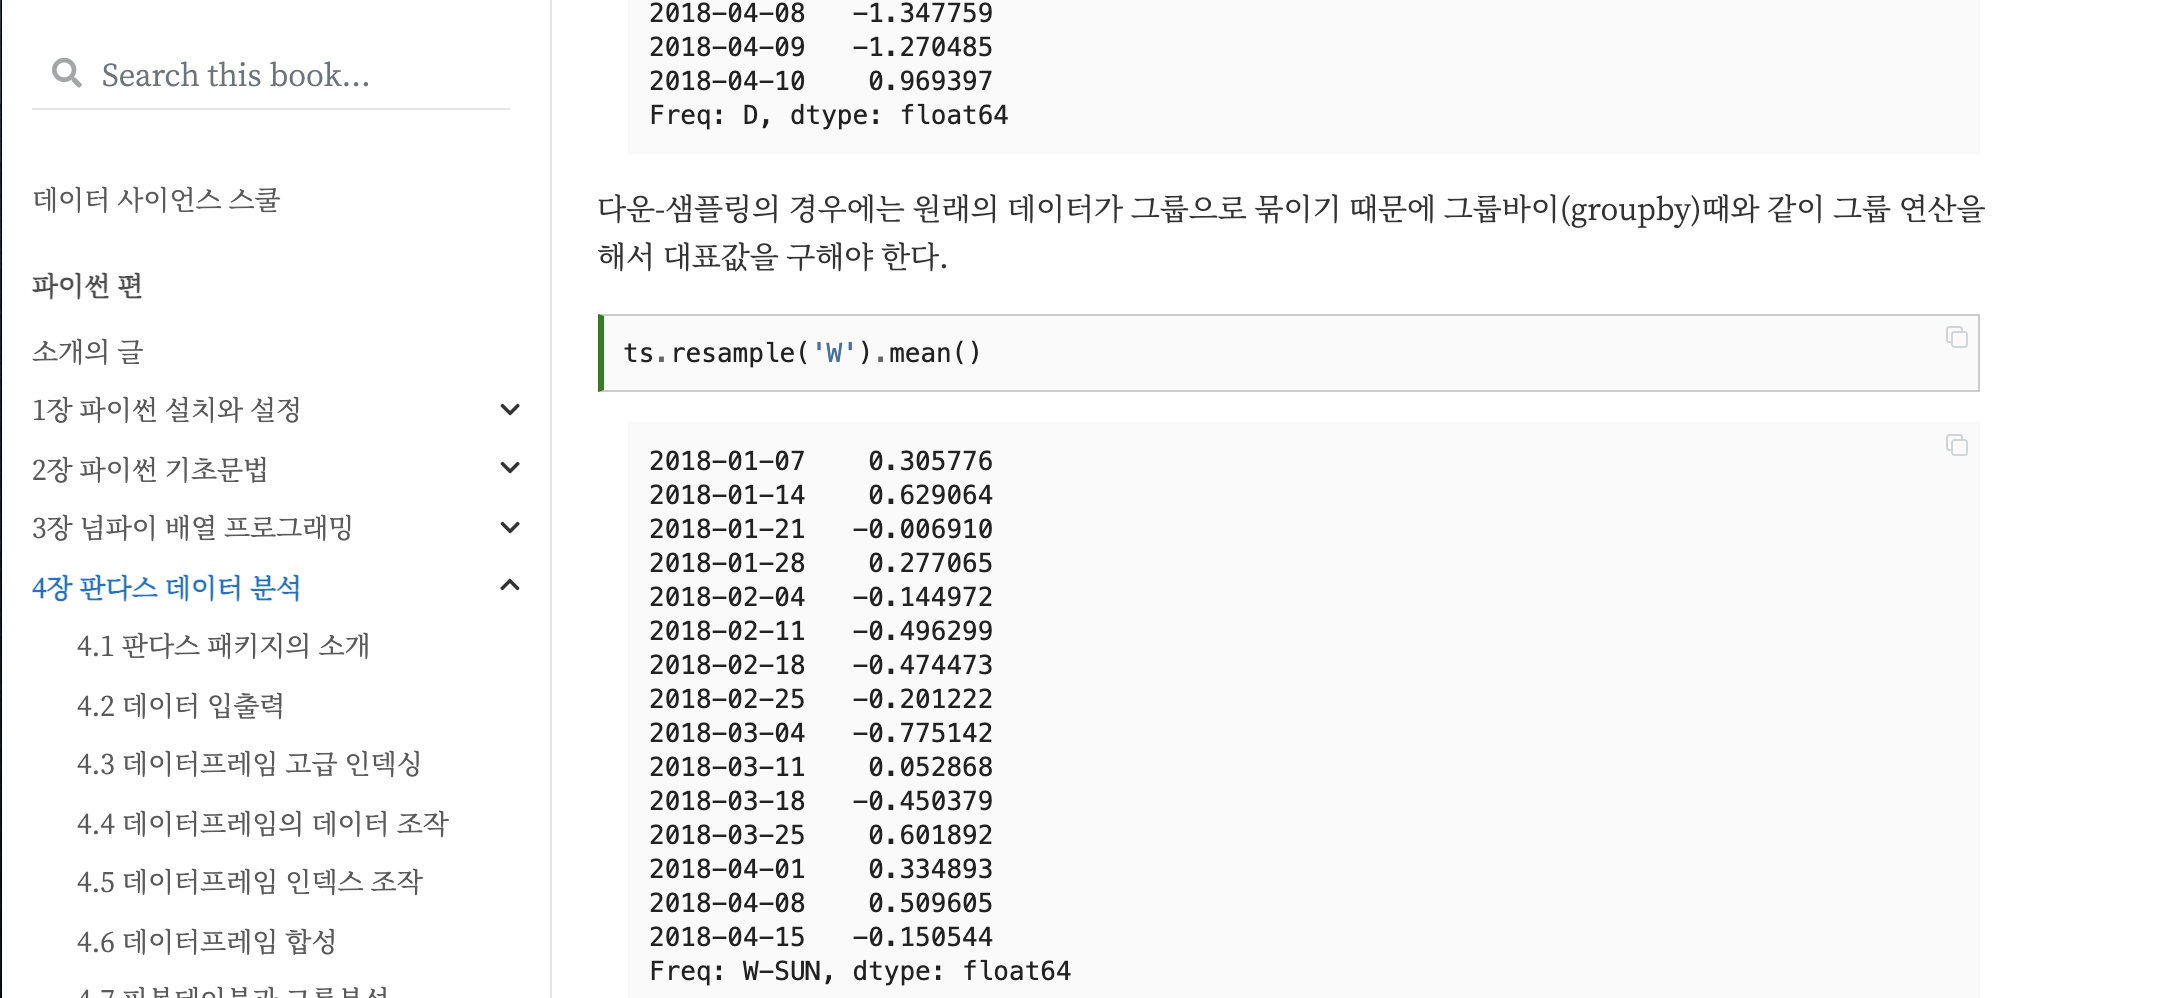

In [40]:
#측정소 별로 나눈 슬라이싱 후에, 각자 다운-샘플링을 활용(월별 평균으로 만든다.)
Image("/Users/adam/Desktop/Screen Shot 2021-10-09 at 8.42.36 PM.png")
#https://datascienceschool.net/01%20python/04.08%20%EC%8B%9C%EA%B3%84%EC%97%B4%20%EC%9E%90%EB%A3%8C%20%EB%8B%A4%EB%A3%A8%EA%B8%B0.html
#datetime 만드는 법 : https://stackoverflow.com/questions/45028015/convert-a-column-of-int64-yyyymmddhhmmss-into-datetime64-without-delimiters


In [91]:
#groupby를 통해 하려 했지만... 시간 데이터를 나눌 수 있는 방법이 없다...
grouped = df['SO2'].groupby(df['측정소코드'])
grouped.mean()

#이렇게 하면 특정값의 평균치를 알아낼 수 있어.  참고 Url:https://rfriend.tistory.com/383

측정소코드
111121.0    0.004751
111122.0    0.005567
111123.0    0.005628
111124.0    0.006307
111125.0    0.004913
              ...   
831491.0    0.003570
831492.0    0.002891
831493.0    0.004180
831494.0    0.001826
831495.0    0.001941
Name: SO2, Length: 611, dtype: float64

In [52]:
df['측정일시'] = pd.to_datetime(df['측정일시'].astype(str),format='%Y%m%d%H') 
#측정일시 콜롬의 데이터 유형이 str이 아니기 때문에 오류발생

ValueError: unconverted data remains: 4

In [53]:
#데이터 유형 확인
df.dtypes

지역        object
측정소명      object
측정소코드    float64
측정일시      object
SO2      float64
CO       float64
O3       float64
NO2      float64
PM10     float64
dtype: object

In [54]:
#'측정일시'콜롬을 datetime유형으로 바꿔주기 위해 str형으로 변환
df['측정일시'].astype(str)

0           2001010101
1           2001010102
2           2001010103
3           2001010104
4           2001010105
               ...    
53953461    2021043020
53953462    2021043021
53953463    2021043022
53953464    2021043023
53953465    2021043024
Name: 측정일시, Length: 47904092, dtype: object

In [55]:
df.dtypes

지역        object
측정소명      object
측정소코드    float64
측정일시      object
SO2      float64
CO       float64
O3       float64
NO2      float64
PM10     float64
dtype: object

In [79]:
#이것도 아니네요...
df['측정일시'] = pd.to_datetime(df['측정일시'].astype(str),format='%Y%m%d%H', infer_datetime_format = False, exact=False)

ValueError: time data '2004-01-01 01' does not match format '%Y%m%d%H' (search)

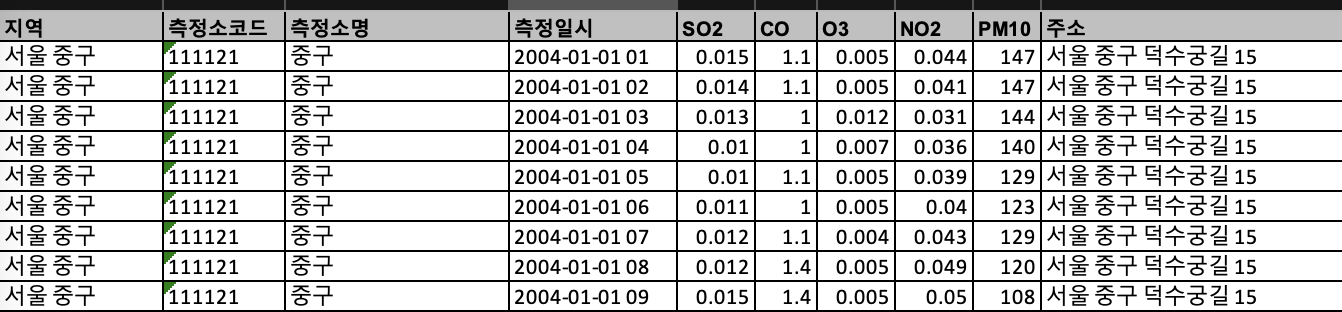

In [70]:
Image("/Users/adam/Desktop/Screen Shot 2021-10-09 at 9.41.06 PM.png")
#2004data는.. 다른 행들과는 다른 측정일시 format을 갖고 있음을 발견...

In [71]:
#다시 column을 분리한 뒤에... 측정일시 포맷을 일치시켜보겠습니다.

In [72]:
df1 = df[['지역', '측정소명', '측정소코드', 'SO2', 'CO', 'O3', 'NO2', 'PM10']]
df2 = df[['측정일시']]

In [73]:
df2

,측정일시
0,2001010101
1,2001010102
2,2001010103
3,2001010104
4,2001010105
...,...
53953461,2021043020
53953462,2021043021
53953463,2021043022
53953464,2021043023


In [74]:
df3 = df2.replace({'측정일시':'2001'}, {'측정일시':'뢰마ㅓㅎ로'})
df3

,측정일시
0,2001010101
1,2001010102
2,2001010103
3,2001010104
4,2001010105
...,...
53953461,2021043020
53953462,2021043021
53953463,2021043022
53953464,2021043023


In [75]:
df2.to_csv('T.csv', encoding = 'utf-8')

In [76]:
df2 #첫번째 시도 : 이 방법도 replace로 할 수 없었기에 실패했습니다.

,측정일시
0,2001010101
1,2001010102
2,2001010103
3,2001010104
4,2001010105
...,...
53953461,2021043020
53953462,2021043021
53953463,2021043022
53953464,2021043023


In [77]:
#두번째 시도 : excel파일로 날짜 형식을 통일시켜주려 했으나... 열수가 없다고 뜹니다.... 도저히 하는 방법을 모르겠어서 2014년도 행도 삭제하도록 하겠습니다...
df2 =[]
df3 = []

In [ ]:
df2.to_csv('T1.csv', encoding = 'utf-8') #세번째 시도 : 판다스로 정규식 활용방법을 모르기때문에.. 일단 함수를 사용 강제해서 불용치로 만든 후 2004 년도 데이터를 삭제해주도록 하겠습니다.

In [92]:
#4번째 시도 : 불용치로 바꾼 후 삭제하기
df['측정일시'] = pd.to_datetime(df['측정일시'].astype(str),format='%Y%m%d%H', errors='coerce', exact=False)
df

,지역,측정소명,측정소코드,측정일시,SO2,CO,O3,NO2,PM10
0,서울,중구,111121.0,2001-01-01 01:00:00,0.010000,0.8,0.012,0.0470,49.199978
1,서울,중구,111121.0,2001-01-01 02:00:00,0.010000,0.7,0.027,0.0400,49.199978
2,서울,중구,111121.0,2001-01-01 03:00:00,0.013000,0.9,0.015,0.0380,49.199978
3,서울,중구,111121.0,2001-01-01 04:00:00,0.014000,0.9,0.020,0.0360,49.199978
4,서울,중구,111121.0,2001-01-01 05:00:00,0.012000,0.7,0.032,0.0290,49.199978
...,...,...,...,...,...,...,...,...,...
53953461,인천 옹진군,울도,831495.0,2021-04-30 20:00:00,0.004872,0.3,0.046,0.0041,32.000000
53953462,인천 옹진군,울도,831495.0,2021-04-30 21:00:00,0.004872,0.3,0.045,0.0040,23.000000
53953463,인천 옹진군,울도,831495.0,2021-04-30 22:00:00,0.004872,0.3,0.041,0.0071,26.000000
53953464,인천 옹진군,울도,831495.0,2021-04-30 23:00:00,0.004872,0.3,0.035,0.0114,25.000000


In [93]:
df['측정일시'].isnull().sum()

1344528

In [94]:
df=df.dropna(axis=0)

In [95]:
df

,지역,측정소명,측정소코드,측정일시,SO2,CO,O3,NO2,PM10
0,서울,중구,111121.0,2001-01-01 01:00:00,0.010000,0.8,0.012,0.0470,49.199978
1,서울,중구,111121.0,2001-01-01 02:00:00,0.010000,0.7,0.027,0.0400,49.199978
2,서울,중구,111121.0,2001-01-01 03:00:00,0.013000,0.9,0.015,0.0380,49.199978
3,서울,중구,111121.0,2001-01-01 04:00:00,0.014000,0.9,0.020,0.0360,49.199978
4,서울,중구,111121.0,2001-01-01 05:00:00,0.012000,0.7,0.032,0.0290,49.199978
...,...,...,...,...,...,...,...,...,...
53953461,인천 옹진군,울도,831495.0,2021-04-30 20:00:00,0.004872,0.3,0.046,0.0041,32.000000
53953462,인천 옹진군,울도,831495.0,2021-04-30 21:00:00,0.004872,0.3,0.045,0.0040,23.000000
53953463,인천 옹진군,울도,831495.0,2021-04-30 22:00:00,0.004872,0.3,0.041,0.0071,26.000000
53953464,인천 옹진군,울도,831495.0,2021-04-30 23:00:00,0.004872,0.3,0.035,0.0114,25.000000


In [99]:
n = len(pd.unique(df['측정소코드']))
#측정소별로 어떻게 월별 평균을 구할까 고민하는 과정에서 측정소의 개수를 측정
print("측정소의 개수:\n",n)

측정소의 개수:
 611


In [104]:
center_code = pd.unique(df['측정소코드']).tolist() #클러스트링을 통해 분류

In [105]:
print(center_code)

[111121.0, 111122.0, 111123.0, 111124.0, 111131.0, 111141.0, 111142.0, 111151.0, 111152.0, 111153.0, 111154.0, 111161.0, 111171.0, 111181.0, 111191.0, 111201.0, 111202.0, 111212.0, 111221.0, 111222.0, 111231.0, 111232.0, 111241.0, 111251.0, 111261.0, 111262.0, 111263.0, 111271.0, 111273.0, 111274.0, 111281.0, 111291.0, 111301.0, 111311.0, 131111.0, 131112.0, 131113.0, 131121.0, 131122.0, 131123.0, 131131.0, 131141.0, 131142.0, 131144.0, 131161.0, 131162.0, 131191.0, 131192.0, 131193.0, 131194.0, 131201.0, 131202.0, 131211.0, 131221.0, 131231.0, 131232.0, 131241.0, 131341.0, 131381.0, 131411.0, 131441.0, 131471.0, 131501.0, 132401.0, 221112.0, 221131.0, 221141.0, 221152.0, 221162.0, 221172.0, 221181.0, 221182.0, 221191.0, 221202.0, 221221.0, 238111.0, 238112.0, 238120.0, 238121.0, 238122.0, 238123.0, 238124.0, 238126.0, 238127.0, 238128.0, 238129.0, 238131.0, 238141.0, 238142.0, 238143.0, 238151.0, 238181.0, 238191.0, 238361.0, 238371.0, 238372.0, 238373.0, 324115.0, 324121.0, 324123.0,

In [106]:
#하지만 반복문으로 4천만개의 행을 검사하며 그룹을 짓는다면 너무나 오래걸릴꺼 같다. 어떤 좋은 방법 없을까??
#그렇다면 미리 월별로 합치는게 좋겠다. 훨씬 더 행의 개수가 줄어들태니까. 
#아니다. 결국 특정 '측정소코드'에서 월별로 데이터를 합쳐야해.



In [107]:
df1 = df[['측정소코드','측정일시', '지역', '측정소명', 'SO2', 'CO', 'O3', 'NO2', 'PM10']]
df1

,측정소코드,측정일시,지역,측정소명,SO2,CO,O3,NO2,PM10
0,111121.0,2001-01-01 01:00:00,서울,중구,0.010000,0.8,0.012,0.0470,49.199978
1,111121.0,2001-01-01 02:00:00,서울,중구,0.010000,0.7,0.027,0.0400,49.199978
2,111121.0,2001-01-01 03:00:00,서울,중구,0.013000,0.9,0.015,0.0380,49.199978
3,111121.0,2001-01-01 04:00:00,서울,중구,0.014000,0.9,0.020,0.0360,49.199978
4,111121.0,2001-01-01 05:00:00,서울,중구,0.012000,0.7,0.032,0.0290,49.199978
...,...,...,...,...,...,...,...,...,...
53953461,831495.0,2021-04-30 20:00:00,인천 옹진군,울도,0.004872,0.3,0.046,0.0041,32.000000
53953462,831495.0,2021-04-30 21:00:00,인천 옹진군,울도,0.004872,0.3,0.045,0.0040,23.000000
53953463,831495.0,2021-04-30 22:00:00,인천 옹진군,울도,0.004872,0.3,0.041,0.0071,26.000000
53953464,831495.0,2021-04-30 23:00:00,인천 옹진군,울도,0.004872,0.3,0.035,0.0114,25.000000


In [114]:
#데이터 프레임 측정소별로 나누기 1차시도
for i in (0, len(center_code)):
    i = df1['측정소코드'] == 'center_code[i]'
    data1 = df[i]
    print(i)
    #1차 실패

0           False
1           False
2           False
3           False
4           False
            ...  
53953461    False
53953462    False
53953463    False
53953464    False
53953465    False
Name: 측정소코드, Length: 46559564, dtype: bool
0           False
1           False
2           False
3           False
4           False
            ...  
53953461    False
53953462    False
53953463    False
53953464    False
53953465    False
Name: 측정소코드, Length: 46559564, dtype: bool


In [117]:
#데이터 프레임 측정소별로 나누기 2차시도
df1.loc[111121.0]
#2차 실패...

측정소코드               131202.0
측정일시     2001-02-10 02:00:00
지역                    경기 과천시
측정소명                     과천동
SO2                    0.025
CO                       1.3
O3                  0.025271
NO2                     0.04
PM10                    48.0
Name: 111121, dtype: object

In [118]:
#측정소를 도시별 17개로 나눠서 측정하는게 아닐까?

dept = df.groupby(['측정소코드'])

In [121]:
dept.mean()#오늘은 여기서 그만

,SO2,CO,O3,NO2,PM10
측정소코드,,,,,
111121.0,0.004790,0.671309,0.019884,0.034370,52.890933
111122.0,0.005577,0.778531,0.013454,0.046908,58.784690
111123.0,0.005667,0.566799,0.021298,0.031922,49.799394
111124.0,0.006311,0.685116,0.015402,0.043091,54.804222
111125.0,0.004913,0.601738,0.017579,0.041845,48.063176
...,...,...,...,...,...
831491.0,0.003570,0.425901,0.044339,0.006885,44.822112
831492.0,0.002891,0.358937,0.040044,0.005843,39.361221
831493.0,0.004180,0.380663,0.041117,0.010580,37.320098


In [122]:
df1.to_csv('FinalTry.csv', encoding = 'utf-8')